# Case Study Project - Food Claims Process

## Company Background

Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. For example, they blame
Vivendo for suspected food poisoning.
The legal team, who processes these claims, is currently split across four locations. The new
head of the legal department wants to see if there are differences in the time it takes to close
claims across the locations.

## Customer Question

The legal team has given you a data set where each row is a claim made against the
company. They would like you to answer the following questions:

- How does the number of claims differ across locations?
- What is the distribution of time to close claims?
- How does the average time to close claims differ by location?

|Column Name          |Criteria                                                                                                                             |     
|---------------------|-------------------------------------------------------------------------------------------------------------------------------------|  
|Claim ID             |Character, the unique identifier of the claim.                                                                                       |
|Time to Close        |Numeric, number of days it took for the claim to be closed.                                                                          |
|Claim Amount         |Numeric, initial claim value in the currency of Brazil. For example,“R$50,000.00” should be converted into 50000.                    |
|Amount Paid          |Numeric, total amount paid after the claim closed in the currency of Brazil.                                                         |
|Location             |Character, location of the claim, one of “RECIFE”, “SAO LUIS”,“FORTALEZA”, or “NATAL”.                                               |
|Individuals on Claim |Numeric, number of individuals on this claim.                                                                                        |
|Linked Cases         |Binary, whether this claim is believed to be linked with other cases, either TRUE or FALSE.                                          |
|Cause                |Character, the cause of the food poisoning injuries, one of ‘vegetable’, ‘meat’, or 'unknown’. Replace any empty rows with ‘unknown’.|

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statistics as st

In [2]:
# First inspection of DataFrame
df = pd.read_csv('claims.csv')
df.head(10)

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat
5,0000000-00.2014.0.00.0077,578,"R$150,000.00",23214.56,FORTALEZA,6,False,NaN
6,0000000-00.2014.0.00.0076,378,"R$50,000.00",25281.18,NATAL,2,False,meat
7,0000000-00.2014.0.00.0043,2354,"R$40,870.00",24161.73,FORTALEZA,1,False,NaN
8,0000000-00.2014.0.00.0071,2325,"R$70,000.00",37464.39,FORTALEZA,3,False,NaN
9,0000000-00.2015.0.00.0000,2058,"R$55,000.00",9199.03,RECIFE,2,False,NaN


# Data Validation

In [3]:
# Checking the completeness of the Location's values
df.shape

(98, 8)

In [4]:
# Checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [5]:
# Checking the completeness of the Claim ID
len(df['Claim ID'].unique())

98

In [6]:
# Because Time to Close refers to days it tooks for the claim to be closed, then should not be negative days
# Then, I ensure to remove negative values at Time to Close
df = df[df['Time to Close'] > 0]

In [7]:
# Transforming Claim Amount Series to be numerical and type Int, from R$50,000.00 to 50000

# First striping the first two characters from the left, next strip the comma character
# then cast from string to numeric with astype and finally convert to integer also with astype

# I have did it in one-line to save space and time to building new variables
df['Claim Amount'] = df['Claim Amount'].str.lstrip('R$').str.replace(',','').astype('float').astype('int')
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


In [8]:
# Checking for negative values at Individual on Claim Series

[i for i in df['Claim Amount'] if i < 0]

[]

In [9]:
# Check consistency on Location Series
df.Location.value_counts()

SAO LUIS     29
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

In [10]:
# Checking for negative values at Individual on Claim Series
[i for i in df['Individuals on Claim'] if i < 0]

[]

In [11]:
# Ensuring consistency of Linked Cases column
df['Linked Cases'].value_counts()

False    88
True      9
Name: Linked Cases, dtype: int64

In [12]:
df['Cause'].value_counts()

meat          12
vegetables     8
Name: Cause, dtype: int64

In [13]:
# Ensuring consistency at Cause column
df.Cause = df.Cause.fillna(value='unknown')

In [14]:
# Make sure changes were applied
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


In [15]:
# Make sure changes were applied

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              97 non-null     object 
 1   Time to Close         97 non-null     int64  
 2   Claim Amount          97 non-null     int64  
 3   Amount Paid           97 non-null     float64
 4   Location              97 non-null     object 
 5   Individuals on Claim  97 non-null     int64  
 6   Linked Cases          97 non-null     bool   
 7   Cause                 97 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 6.2+ KB


## Data Discovering and Visualization

### How does the number of claims differ across locations?

In [16]:
# For a better understand of number of claims across locations is necessary to replace white space by underscore
# and count claims per location

df['Location'] = df['Location'].replace(' ','_', regex=True)
df['Location'].value_counts()

SAO_LUIS     29
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

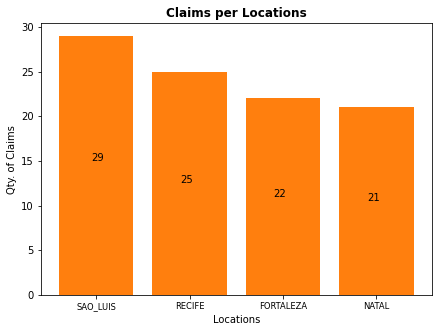

In [17]:
# Using bar plot to represent the number of claims across locations

# Setting size of plot
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

# Plotting barplot
plt.bar(range(len(df['Location'].value_counts())), df['Location'].value_counts().values, align='center', color='tab:orange')

# Showing ticks
plt.xticks(range(len(df['Location'].value_counts())), df['Location'].value_counts().index.values, size='small')

# Values inside the bars
plt.text(x=2.9,y=10.5,s=df['Location'].value_counts().values[3])
plt.text(x=-0.05,y=15,s=df['Location'].value_counts().values[0])
plt.text(x=0.9,y=12.5,s=df['Location'].value_counts().values[1])
plt.text(x=1.9,y=11,s=df['Location'].value_counts().values[2])

# Setting tile and labels
plt.title("Claims per Locations", fontweight='bold')
plt.xlabel('Locations')
plt.ylabel('Qty. of Claims')

# Showing plot
plt.show()

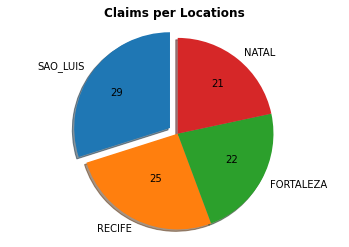

In [18]:
# Using pie chart to remark the number of claims across the locations

# Defining values and categories from categorical data
sizes=df['Location'].value_counts().values
labels=df['Location'].value_counts().index

# Setting explode feature in pie-chart
explode=(0.1,0,0,0)

# Plotting pie-chart
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)

# Values inside the bars
plt.text(x=0.35,y=0.5,s=df['Location'].value_counts().values[3])
plt.text(x=-0.7,y=0.4,s=df['Location'].value_counts().values[0])
plt.text(x=-0.3,y=-0.5,s=df['Location'].value_counts().values[1])
plt.text(x=0.5,y=-0.3,s=df['Location'].value_counts().values[2])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Claims per Locations", fontweight='bold')
plt.axis('equal')  

# Showing plot
plt.show()

In [19]:
# To see how differ, in percentage, the number of Claims across Locations I calculated the difference 
# in percentage from the lowest to the highest number of claims and build a pre-summary DataFrame

# Number of Claims across Locations
claims_per_location=list(df['Location'].value_counts().values)

# List of Locations
locations = df['Location'].value_counts().index

# % Diff from highest number of claims
diff = [round(((i - min(claims_per_location))/min(claims_per_location))*100,2) for i in claims_per_location]

# Cretaing DataFrame
df_claims_across_locations = pd.DataFrame(index=locations, data={'claims':claims_per_location,
                                                                 '%diff_from_lowest_claims':diff})
df_claims_across_locations

,claims,%diff_from_lowest_claims
SAO_LUIS,29,38.10
RECIFE,25,19.05
FORTALEZA,22,4.76
NATAL,21,0.00


The number of claims is higher in SAO LUIS, and the lowest number of claims is in NATAL. Specifically, SAO LUIS has 38% more claims than Natal

## What is the distribution of time to close claims?

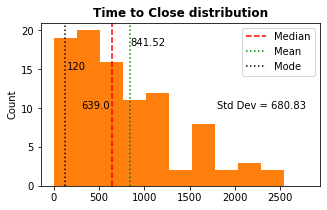

In [20]:
# To see the Distribution a histogram is useful

# FIRST VISUALIZATION (BAR-PLOT) TO DEMONSTRATE THE CHARACTERISTIC OF TIME TO CLOSE VARIABLE

# Setting size of plot
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)

# Freedman-Diaconis rule to find number of bins
q1 = np.quantile(df['Time to Close'], 0.25)
q3 = np.quantile(df['Time to Close'], 0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df['Time to Close']) ** (1 / 3))
bin_count = int(np.ceil((max(df['Time to Close']) - min(df['Time to Close'])) / bin_width))

# Plotting histogram
plt.hist(df['Time to Close'], bins=bin_count, range=(0,2800), color='tab:orange')

# Adding trend line of the Median
plt.axvline(x=np.quantile(df['Time to Close'],0.5), color= 'red', linestyle='--', label='Median')
plt.text(300,10,np.quantile(df['Time to Close'],0.5), fontsize='medium', fontweight='book')

# Adding trend line of the Mean
plt.axvline(x=np.mean(df['Time to Close']), color= 'green', linestyle=':', label='Mean')
plt.text(850,18,round(np.mean(df['Time to Close']),2), fontsize='medium', fontweight='book')

# Adding trend line of the Mode
plt.axvline(x=st.mode(df['Time to Close']), color= 'black', linestyle=':', label='Mode')
plt.text(150,15,round(st.mode(df['Time to Close']),2), fontsize='medium', fontweight='book')

# Adding Std Dev
plt.text(1800,10,"Std Dev = " + str(round(np.std(df['Time to Close']),2)), fontsize='medium', fontweight='book')

# Setting title and labels
plt.title("Time to Close distribution", fontweight='bold')
plt.ylabel('Count')
plt.legend()

# Showing plot
plt.show()

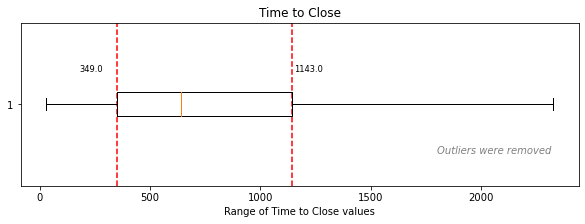

In [21]:
# Then a box-plot could add more information by finding the Intequantile Range of Time to Close claims

# SECOND VISUALIZATION (BOX-PLOT) TO DEMONSTRATE THE CHARACTERISTIC OF TIME TO CLOSE VARIABLE

# Setting size of plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

# Adding trend line of 25th percentile
plt.axvline(x=np.quantile(df['Time to Close'],0.25), color= 'red', linestyle='--')
plt.text(180,1.2,np.quantile(df['Time to Close'],0.25), fontsize='small')

# Adding trend line of 75th percentile
plt.axvline(x=np.quantile(df['Time to Close'],0.75), color= 'red', linestyle='--')
plt.text(1150,1.2,np.quantile(df['Time to Close'],0.75), fontsize='small')

# Plotting boxplot
plt.boxplot(df['Time to Close'], sym='',vert=False)

# Textbox for off outliers
plt.text(1800,0.7,"Outliers were removed", alpha=0.5, fontstyle='italic')

# Setting title and label
plt.title('Time to Close')
plt.xlabel('Range of Time to Close values')

# Showing plot
plt.show()



The distribution of Time to Close Claims is a "Right Skewed" also known as a positively skewed histogram, that can be verified by its Mean > Median > Mode. The Interquartile Range for the Time to Close a Claim across all four Locations is between 349 and 1143 days. However, it must be remembered that the highest number of Claims is at Sao Luis.

## How does the average Time to Close Claims differ by Location?

In [22]:
# Firstly, I obtain the average Time To Close for each Location

# Grouping by Locations, but only Mean of Time to Close
df_time_by_location = df.groupby(['Location']).mean()['Time to Close'].sort_values(ascending=False)
df_time_by_location

Location
SAO_LUIS     1063.620690
RECIFE        860.680000
FORTALEZA     775.500000
NATAL         581.142857
Name: Time to Close, dtype: float64

In [23]:
# Then based on the number of Claims across Locations, I get the average time per location and I compare 
# the data in a DataFrame

# Number of Claims across Locations
claims_per_location=list(df['Location'].value_counts().values)

# List of Locations
locations = df['Location'].value_counts().index

# % Diff from highest number of claims
diff_claims = [round(((i - min(claims_per_location))/min(claims_per_location))*100,2) for i in claims_per_location]

# Avg Time to Close per Location
avg_time_locations = list(round(df.groupby(['Location']).mean(),2)['Time to Close'].sort_values(ascending=False).values)

# % Diff from highest avg Time to Close
diff_avg_time = [round(((i - min(avg_time_locations))/min(avg_time_locations))*100,2) for i in avg_time_locations]

# Cretaing DataFrame
df_claims_avg_time_across_locations = pd.DataFrame(index=locations, data={'claims':claims_per_location,
                                                                 '%diff_from_lowest_claims':diff_claims,
                                                                 'avg_time_to_close':avg_time_locations,
                                                                 '%diff_from lowest_avg_time':diff_avg_time})
df_claims_avg_time_across_locations

,claims,%diff_from_lowest_claims,avg_time_to_close,%diff_from lowest_avg_time
SAO_LUIS,29,38.10,1063.62,83.02
RECIFE,25,19.05,860.68,48.10
FORTALEZA,22,4.76,775.50,33.44
NATAL,21,0.00,581.14,0.00


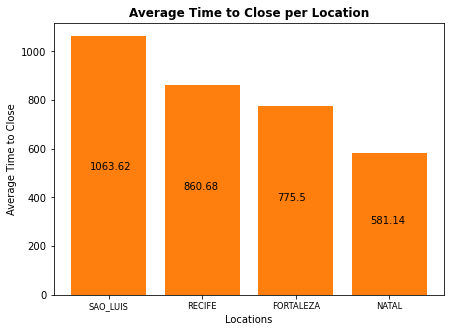

In [24]:
# Using bar plot to inspect the average time to close across locations, to demonstrate the relationship 
# between two or more variables

# Setting size of plot
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

# Plotting a barplot
plt.bar(range(len(df_time_by_location.values)), df_time_by_location.values, align='center', color='tab:orange')

# Showing ticks per Location
plt.xticks(range(len(df_time_by_location.values)), df_time_by_location.index.values, size='small')

# Values inside the bars
plt.text(x=2.8,y=290.5,s=round(df_time_by_location.values[3],2))
plt.text(x=-0.2,y=513,s=round(df_time_by_location.values[0],2))
plt.text(x=0.8,y=430,s=round(df_time_by_location.values[1],2))
plt.text(x=1.8,y=387.5,s=round(df_time_by_location.values[2],2))

# Setting titles and labels
plt.title("Average Time to Close per Location", fontweight='bold')
plt.xlabel('Locations')
plt.ylabel('Average Time to Close')

# Showing plot
plt.show()

The highest average Time to Close a Claim is at Sao Luis, and the lowest average Time to Close a Claim is at Natal. As occurs with the number of Claims, the highest at Sao Luis and the lowest at Natal.

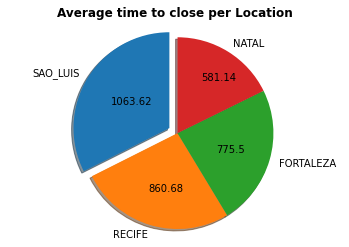

In [25]:
# Pie chart to remark the mean of time to close per location

sizes = df_time_by_location.values
labels = df_time_by_location.index
explode = (0.1,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.text(x=0.25,y=0.55,s=round(df_time_by_location.values[3],2))
plt.text(x=-0.7,y=0.3,s=round(df_time_by_location.values[0],2))
plt.text(x=-0.3,y=-0.6,s=round(df_time_by_location.values[1],2))
plt.text(x=0.4,y=-0.2,s=round(df_time_by_location.values[2],2))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Average time to close per Location", fontweight='bold')
plt.axis('equal')  
plt.show()

**Inspecting Time to Close Distribution per Location**

In [26]:
# To observe how to differ Average Time to Close across Locations in a individually way and in a single boxplot, 
# I created four lists of Time to Close to plotting four boxplots showing their distributions

# I get the name of each Location
locations = df['Location'].value_counts().index

# Then I create four lists with their respective name to which data belongs
for i in locations:
    globals()['df_' + i] = list(df[df['Location'] == i]['Time to Close'])
 

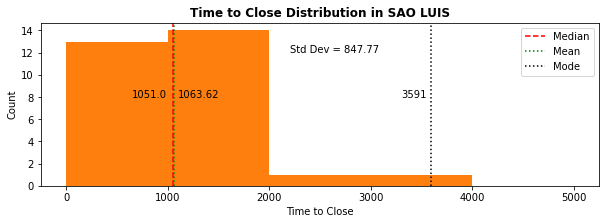

In [27]:
# Distribution of SAO LUIS's Time to Close using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

# Freedman-Diaconis rule to find number of bins
q1 = np.quantile(df_SAO_LUIS, 0.25)
q3 = np.quantile(df_SAO_LUIS, 0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df_SAO_LUIS) ** (1 / 3))
bin_count = int(np.ceil((max(df_SAO_LUIS) - min(df_SAO_LUIS)) / bin_width))

# Creating histogram
plt.hist(df_SAO_LUIS, bins=bin_count, range=(0,5000), color='tab:orange')

# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_SAO_LUIS,0.5), color= 'red', linestyle='--', label='Median')
plt.text(650,8,np.quantile(df_SAO_LUIS,0.5), fontsize='medium')

# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_SAO_LUIS), color= 'green', linestyle=':', label='Mean')
plt.text(1100,8,round(np.mean(df_SAO_LUIS),2), fontsize='medium')

# Adding trend line of the Mode
plt.axvline(x=st.mode(df_SAO_LUIS), color= 'black', linestyle=':', label='Mode')
plt.text(3300,8,round(st.mode(df_SAO_LUIS),2), fontsize='medium')

# Adding Std Dev
plt.text(2200,12,"Std Dev = " + str(round(np.std(df_SAO_LUIS),2)), fontsize='medium', fontweight='book')

# Setting titles and labels
plt.title("Time to Close Distribution in SAO LUIS", fontweight='bold')
plt.xlabel('Time to Close')
plt.ylabel('Count')
plt.legend()

# Showing plot
plt.show()

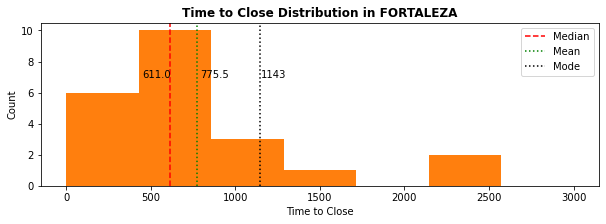

In [28]:
# Distribution of FORTALEZA's Time to Close using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

# Freedman-Diaconis rule to find number of bins
q1 = np.quantile(df_FORTALEZA, 0.25)
q3 = np.quantile(df_FORTALEZA, 0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df_FORTALEZA) ** (1 / 3))
bin_count = int(np.ceil((max(df_FORTALEZA) - min(df_FORTALEZA)) / bin_width))

# Creating histogram
plt.hist(df_FORTALEZA, bins=bin_count, range=(0,3000), color='tab:orange')
# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_FORTALEZA,0.5), color= 'red', linestyle='--', label='Median')
plt.text(450,7,np.quantile(df_FORTALEZA,0.5), fontsize='medium')
# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_FORTALEZA), color= 'green', linestyle=':', label='Mean')
plt.text(790,7,round(np.mean(df_FORTALEZA),2), fontsize='medium')
# Adding trend line of the Mode
plt.axvline(x=st.mode(df_FORTALEZA), color= 'black', linestyle=':', label='Mode')
plt.text(1150,7,round(st.mode(df_FORTALEZA),2), fontsize='medium')
# Setting titles and labels
plt.title("Time to Close Distribution in FORTALEZA", fontweight='bold')
plt.xlabel('Time to Close')
plt.ylabel('Count')
plt.legend()
# Showing plot
plt.show()

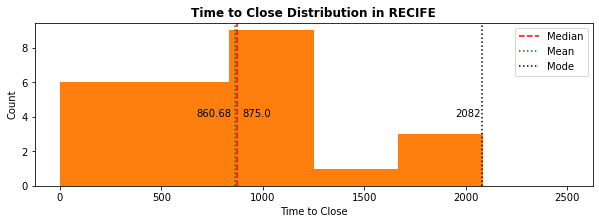

In [29]:
# Distribution of RECIFE's Time to Close using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

# Freedman-Diaconis rule to find number of bins
q1 = np.quantile(df_RECIFE, 0.25)
q3 = np.quantile(df_RECIFE, 0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df_RECIFE) ** (1 / 3))
bin_count = int(np.ceil((max(df_RECIFE) - min(df_RECIFE)) / bin_width))

# Creating histogram
plt.hist(df_RECIFE, bins=bin_count, range=(0,2500), color='tab:orange')

# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_RECIFE,0.5), color= 'red', linestyle='--', label='Median')
plt.text(900,4,np.quantile(df_RECIFE,0.5), fontsize='medium')

# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_RECIFE), color= 'green', linestyle=':', label='Mean')
plt.text(670,4,round(np.mean(df_RECIFE),2), fontsize='medium')

# Adding trend line of the Mode
plt.axvline(x=st.mode(df_RECIFE), color= 'black', linestyle=':', label='Mode')
plt.text(1950,4,round(st.mode(df_RECIFE),2), fontsize='medium')

# Setting titles and labels
plt.title("Time to Close Distribution in RECIFE", fontweight='bold')
plt.xlabel('Time to Close')
plt.ylabel('Count')
plt.legend()

# Showing plot
plt.show()

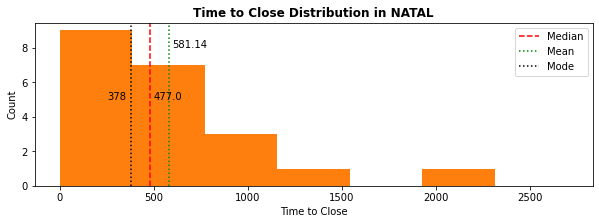

In [30]:
# Distribution of NATAL's Time to Close using histogram

# Adjusting plot size
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

# Freedman-Diaconis rule to find number of bins
q1 = np.quantile(df_NATAL, 0.25)
q3 = np.quantile(df_NATAL, 0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df_NATAL) ** (1 / 3))
bin_count = int(np.ceil((max(df_NATAL) - min(df_NATAL)) / bin_width))

# Creating histogram
plt.hist(df_NATAL, bins=bin_count, range=(0,2700), color='tab:orange')

# Adding a trend line of the Median
plt.axvline(x=np.quantile(df_NATAL,0.5), color= 'red', linestyle='--', label='Median')
plt.text(500,5,np.quantile(df_NATAL,0.5), fontsize='medium')

# Adding a trend line of the Mean
plt.axvline(x=np.mean(df_NATAL), color= 'green', linestyle=':', label='Mean')
plt.text(600,8,round(np.mean(df_NATAL),2), fontsize='medium')

# Adding trend line of the Mode
plt.axvline(x=st.mode(df_NATAL), color= 'black', linestyle=':', label='Mode')
plt.text(250,5,round(st.mode(df_NATAL),2), fontsize='medium')

# Setting titles and labels
plt.title("Time to Close Distribution in NATAL", fontweight='bold')
plt.xlabel('Time to Close')
plt.ylabel('Count')
plt.legend()

# Showing plot
plt.show()

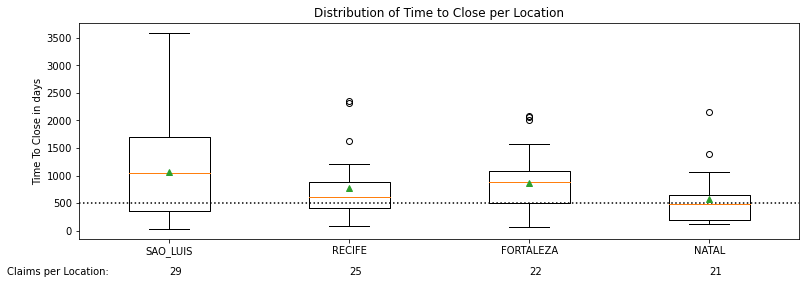

In [31]:
# Boxplot of the Time to Close per Location, I worked with the four lists of Time to Close created previously

# FIRST VISUALIZATION (BOX-PLOT) TO DEMONSTRATE THE RELATIONSHIP BETWEEN TIME TO CLOSE PER LOCATION VARIABLES

# To show number of claims across locations in the bottom of boxplot
num_claims_per_location = list(df['Location'].value_counts().values)

# Location's name to show trick labels in boxplot
locations = df['Location'].value_counts().index

fig = plt.figure(figsize =(10, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data = [df_SAO_LUIS, df_FORTALEZA, df_RECIFE, df_NATAL] 

# Creating plot
bp = ax.boxplot(data, showmeans=True)
ax.axhline(y=500, color= 'black', linestyle=':')
ax.set_xticklabels(locations)
ax.set_title('Distribution of Time to Close per Location')
ax.set_ylabel('Time To Close in days')
ax.text(.1,-800, "Claims per Location: ")
for i,j in enumerate(num_claims_per_location,1):
    ax.text(i, -800, j)
    
# showing plot
plt.show()

In [32]:
# After finding graphical outliers I decided to obtain a box plot without outliers to compare the Average Time 
# to Close across four Locations
# To do this, I removed outliers only at Fortaleza, Recife and Natal, which show outliers in the previous boxplot

# RECIFE
q1_RECIFE = np.quantile(df_RECIFE, 0.25)
q3_RECIFE = np.quantile(df_RECIFE, 0.75)
iqr_RECIFE = q3_RECIFE - q1_RECIFE
df_RECIFE_no_outliers = [i for i in df_RECIFE if i < (q3_RECIFE + 1.5*iqr_RECIFE)]

# FORTALEZA
q1_FORTALEZA = np.quantile(df_FORTALEZA, 0.25)
q3_FORTALEZA = np.quantile(df_FORTALEZA, 0.75)
iqr_FORTALEZA = q3_FORTALEZA - q1_FORTALEZA
df_FORTALEZA_no_outliers = [i for i in df_FORTALEZA if i < (q3_FORTALEZA + 1.5*iqr_FORTALEZA)]

# NATAL
q1_NATAL = np.quantile(df_NATAL, 0.25)
q3_NATAL = np.quantile(df_NATAL, 0.75)
iqr_NATAL = q3_NATAL - q1_NATAL
df_NATAL_no_outliers = [i for i in df_NATAL if i < (q3_NATAL + 1.5*iqr_NATAL)]

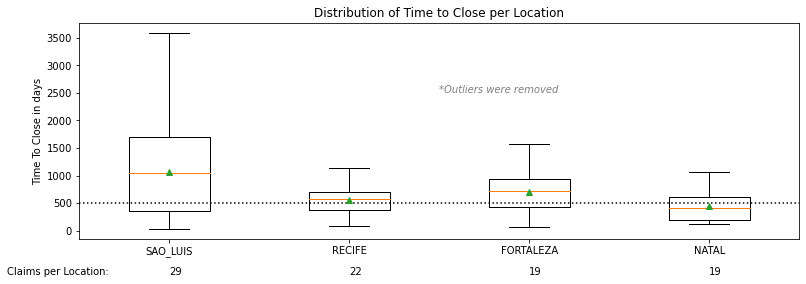

In [33]:
# Boxplot of the Time to Close per Location without outliers

# Location's name to show trick labels in boxplot
locations = df['Location'].value_counts().index

# Number of Claims per Location without outliers
num_claims_per_location_no_outliers = [len(df_SAO_LUIS),len(df_RECIFE_no_outliers),len(df_FORTALEZA_no_outliers),len(df_NATAL_no_outliers)]

fig = plt.figure(figsize =(10, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data = [df_SAO_LUIS, df_FORTALEZA_no_outliers, df_RECIFE_no_outliers, df_NATAL_no_outliers] 

# Creating plot
bp = ax.boxplot(data, showmeans=True, showfliers = False)
ax.axhline(y=500, color= 'black', linestyle=':')
ax.set_xticklabels(locations)
ax.set_title('Distribution of Time to Close per Location')
ax.set_ylabel('Time To Close in days')

# Text of the Removing outliers
plt.text(2.5,2500,"*Outliers were removed", alpha=0.5, fontstyle='italic')

ax.text(.1,-800, "Claims per Location: ")
for i,j in enumerate(num_claims_per_location_no_outliers,1):
    ax.text(i, -800, j)
    
# showing plot
plt.show()

Even though the highest average of Time to Close a Claim is at Sao Luis, the averages of Time to Close (green triangles) for Fortaleza and Recife are affected by outliers, forcing them to augment and get close to the average Time to Close of Sao Luis.

In [34]:
# Creating a DF summary about Time to Close statistics across Locations incluiding outliers

# Mean Time to Close across Locations
mean_time = list(round(df.groupby(['Location']).mean(),2)['Time to Close'].sort_values(ascending=False).values)

# Number of Claims across Locations
claims_per_location=list(df['Location'].value_counts().values)

# List of Locations
locations = df['Location'].value_counts().index

# Median Time to Close across Locations
median_time = list(round(df.groupby(['Location']).median(),2)['Time to Close'].sort_values(ascending=False).values)

# Std Deviation Time to Close across Locations
std_dev_time = list(round(df.groupby(['Location']).std(),2)['Time to Close'].sort_values(ascending=False).values)

# Mode Time to Close across Locations
mode_time = [st.mode(i) for i in data]

# Cretaing DataFrame
df_summary = pd.DataFrame(index=locations, data={'claims':claims_per_location,'average_time':mean_time, 
                                                 'median_time':median_time, 'std_dev_time':std_dev_time,
                                                'mode_time':mode_time})
df_summary

,claims,average_time,median_time,std_dev_time,mode_time
SAO_LUIS,29,1063.62,1051.0,862.78,3591
RECIFE,25,860.68,875.0,626.95,1143
FORTALEZA,22,775.50,611.0,577.32,1573
NATAL,21,581.14,477.0,495.29,378


In [35]:
# Creating a DF summary about Time to Close statistics across Locations without outliers

# Mean Time to Close across Locations
mean_time = [np.mean(df_SAO_LUIS),np.mean(df_FORTALEZA_no_outliers), 
                      np.mean(df_RECIFE_no_outliers), np.mean(df_NATAL_no_outliers)]

# Number of Claims across Locations
claims_per_location= [len(df_SAO_LUIS),len(df_FORTALEZA_no_outliers), 
                      len(df_RECIFE_no_outliers), len(df_NATAL_no_outliers)]

# List of Locations
locations = df['Location'].value_counts().index

# Median Time to Close across Locations
median_time = [np.median(df_SAO_LUIS),np.median(df_FORTALEZA_no_outliers), 
                      np.median(df_RECIFE_no_outliers), np.median(df_NATAL_no_outliers)]

# Std Deviation Time to Close across Locations
std_dev_time = [np.std(df_SAO_LUIS),np.std(df_FORTALEZA_no_outliers), 
                      np.std(df_RECIFE_no_outliers), np.std(df_NATAL_no_outliers)]

# Mode Time to Close across Locations
mode_time = [st.mode(df_SAO_LUIS),st.mode(df_FORTALEZA_no_outliers), 
                      st.mode(df_RECIFE_no_outliers), st.mode(df_NATAL_no_outliers)]

# Cretaing DataFrame
df_summary_no_outliers = pd.DataFrame(index=locations, data={'claims':claims_per_location,'average_time':mean_time, 
                                                 'median_time':median_time, 'std_dev_time':std_dev_time,
                                                'mode_time':mode_time})
df_summary_no_outliers

,claims,average_time,median_time,std_dev_time,mode_time
SAO_LUIS,29,1063.620690,1051.0,847.772921,3591
RECIFE,19,565.842105,578.0,307.352577,1143
FORTALEZA,22,698.863636,722.0,381.102503,1573
NATAL,19,455.736842,415.0,279.022701,378


As we observe, after removing outliers the averages of Time to Close in Recife, Fortaleza and Natal get even lower than the average of Time to Close in Sao Luis. Thus, the most appropiate comparison would be without outliers

In [36]:
# Removing outliers in Time to Close at Recife, fortaleza and Natal

df_no_outliers = df.drop(df[(df['Location'] == 'RECIFE') & (df['Time to Close'] > (q3_RECIFE + 1.5*iqr_RECIFE))].index)
df_no_outliers.shape, df.shape

((94, 8), (97, 8))

In [37]:
df_no_outliers = df_no_outliers.drop(df_no_outliers[(df_no_outliers['Location'] == 'FORTALEZA') & (df_no_outliers['Time to Close'] > (q3_FORTALEZA + 1.5*iqr_FORTALEZA))].index)
df_no_outliers.shape, df.shape

((91, 8), (97, 8))

In [38]:
df_no_outliers = df_no_outliers.drop(df_no_outliers[(df_no_outliers['Location'] == 'NATAL') & (df_no_outliers['Time to Close'] > (q3_NATAL + 1.5*iqr_NATAL))].index)
df_no_outliers.shape, df.shape

((89, 8), (97, 8))

In [39]:
# Remembering the Claims and Average Time across Locations calculated before as a Summary, 
# when outliers are included

df_claims_avg_time_across_locations

,claims,%diff_from_lowest_claims,avg_time_to_close,%diff_from lowest_avg_time
SAO_LUIS,29,38.10,1063.62,83.02
RECIFE,25,19.05,860.68,48.10
FORTALEZA,22,4.76,775.50,33.44
NATAL,21,0.00,581.14,0.00


In [40]:
# Now I obtain the same Summary but now without outliers

# Number of Claims across Locations
claims_per_location_no_outliers=list(df_no_outliers['Location'].value_counts().values)

# List of Locations
locations_no_outliers = df_no_outliers['Location'].value_counts().index

# % Diff from highest number of claims
diff_claims_no_outliers = [round(((i - min(claims_per_location_no_outliers))/min(claims_per_location_no_outliers))*100,2) for i in claims_per_location_no_outliers]

# Avg Time to Close per Location
avg_time_locations_no_outliers = list(round(df_no_outliers.groupby(['Location']).mean(),2)['Time to Close'].sort_values(ascending=False).values)

# % Diff from highest avg Time to Close
diff_avg_time_no_outliers = [round(((i - min(avg_time_locations_no_outliers))/min(avg_time_locations_no_outliers))*100,2) for i in avg_time_locations_no_outliers]

# Cretaing DataFrame
df_claims_avg_time_across_locations_no_outliers = pd.DataFrame(index=locations_no_outliers, data={'claims':claims_per_location_no_outliers,
                                                                 '%diff_from_lowest_claims':diff_claims_no_outliers,
                                                                 'avg_time_to_close':avg_time_locations_no_outliers,
                                                                 '%diff_from lowest_avg_time':diff_avg_time_no_outliers})

In [41]:
df_claims_avg_time_across_locations_no_outliers

,claims,%diff_from_lowest_claims,avg_time_to_close,%diff_from lowest_avg_time
SAO_LUIS,29,52.63,1063.62,133.38
RECIFE,22,15.79,698.86,53.35
FORTALEZA,19,0.00,565.84,24.16
NATAL,19,0.00,455.74,0.00


Sao Luis the highest number of Claims, 52%  more claims with respect to Natal, which has the lowest number of Claims. Besides, the average Time to Close a Claim is 134% more in SAO LUIS in comparison with NATAL. This could be due to SAO LUIS having a larger Interquartile Range and a larger Whisker in comparison with the other Locations and without considering the outliers in Fortaleza, Recife and Natal.

**Recommendations**

- SAO LUIS has the highest number of Claims (29), and the highest Average Time to Close too (1063 days).
- NATAL has the lowest number of Claims (19) and also the lowest Average Time to Close (456 days) 
- SAO LUIS has an increase of 134% in Average Time to Close and 52% more claims both in comparison with NATAL. 